In [1]:
%pylab inline
from sigvisa import Sigvisa
from sigvisa.source.event import get_event
from sigvisa.infer.coarse_to_fine_init import ModelSpec, EventRunSpec, do_coarse_to_fine, initialize_from, do_inference
from sigvisa.infer.correlations.event_proposal import correlation_location_proposal #, generate_historical_db
from sigvisa.infer.correlations.ar_correlation_model import estimate_ar, ar_advantage, iid_advantage

from sigvisa.graph.sigvisa_graph import SigvisaGraph
from sigvisa.treegp.gp import GPCov

import os, sys, traceback
import cPickle as pickle

stas = ['ASAR', 'KURK', 'MKAR', 'SONM', 'BVAR', 'FITZ', 'CTA', 'CMAR', 'WRA', 'ZALV', 'MJAR', 'AKTO', 'INK']

doublet = 5334939

evids = [5334501, 5334991, 5334726, 5335144, 5349684, 5335822, 5348178, 5334971, 5349536, 5335079, 5335116, 5335138, 5350499, 5336237, 5335425, 5335424, 5349441, 5336640, 5335577, 5350077, 5336889, 5335760, 5336967, 5337111, 533\
6015, 5337461, 5351821, 5351657, 5336724, 5351713, 5338302, 5338318, 5338388]


Populating the interactive namespace from numpy and matplotlib


In [2]:
doublet_ev = get_event(evid=doublet)
rs = EventRunSpec(evids=[doublet,], stas=["MKAR"], runids=(1,), disable_conflict_checking=False)

ms1 = ModelSpec(template_model_type="gp_lld", wiggle_family="db4_2.0_3_20.0", wiggle_model_type="gp_lld", max_hz=10.0, raw_signals=True)

#ms1 = ModelSpec(template_model_type="param", wiggle_family="iid", max_hz=10.0, raw_signals=True)
sg = rs.build_sg(ms1)
sg.event_end_time = doublet_ev.time + 200
sg.event_start_time = doublet_ev.time - 200
sg.correlation_proposal_stas=["MK31"]

In [3]:
#ev, evlp, (proposals, weights, posteriors, x) = correlation_location_proposal(sg)

In [4]:
#print ev, evlp
#print weights
#print x

In [5]:

from sigvisa.infer.run_mcmc import run_open_world_MH
run_open_world_MH(sg, steps=1000,
                      enable_event_openworld=True,
                      enable_event_moves=True,
                      enable_template_openworld=False,
                      enable_template_moves=True)


step 1: lp -10549.48, accepted event_death_correlation: 0.000%, , uatemplates: 0 , events: 0 
step 2: lp -10549.48, accepted event_death_correlation: 0.000%, , uatemplates: 0 , events: 0 
step 3: lp -10549.48, accepted event_death_correlation: 0.000%, event_death_hough_offset: 0.000%, , uatemplates: 0 , events: 0 
step 4: lp -10549.48, accepted event_death_correlation: 0.000%, event_death_hough_offset: 0.000%, , uatemplates: 0 , events: 0 
MK31
global hough: init 0.000486 stahough 0.199096 adj 0.000339 total 0.199925
-140.0
-135.0
MK31
global hough: init 0.000007 stahough 0.002918 adj 0.000003 total 0.002931
-135.0
-132.5
MK31
global hough: init 0.000007 stahough 0.002391 adj 0.000002 total 0.002403
proposing new ev evid None, loc 134.72 W 66.89 N, depth 0.3km, time 1240245235.6, mb 5.4, natural source
peak_lp -2.33664303831
proposing to birth new phase MK31,P with assoc lp 0.0 tmpl lp -8.520315
birth qforward +  0.0 [-8.52031545] = [-8.52031545]
proposing to delete at MK31 (lp 0.00000

/home/dmoore/python/sigvisa/infer/template_mcmc.py:1367: RuntimeWarning: invalid value encountered in divide
  peak_dist = peak_dist / np.sum(peak_dist)
/home/dmoore/python/sigvisa/infer/correlations/weighted_event_posterior.py:44: RuntimeWarning: divide by zero encountered in log
  origin_ll = np.log(rr) + llmax


done
reverse dist 4.08461396338 0.460802754362 old mb 5.43024662292 lp -2.48646207963
peak_lp -2.33664303831
proposing to birth new phase MK31,P with assoc lp 0.0 tmpl lp -7.747602
birth qforward +  0.0 [-7.74760218] = [-7.74760218]
death helper -2.48646207963 [-7.74760218] -93666002.0565
death move acceptance [-93665988.4241754] from [-10573.34680881] -10549.4804188 [-93666012.2905654] [ 0.]
reverse dist 4.08461396338 0.460802754362 old mb 5.49258215938 lp -2.67271008369
peak_lp -2.22619920782
proposing to birth new phase MK31,P with assoc lp 0.0 tmpl lp -7.407500
birth qforward +  0.0 [-7.40750037] = [-7.40750037]
death helper -2.67271008369 [-7.40750037] -93803522.048
death move acceptance [-93803508.57303485] from [-10573.03561094] -10549.4804188 [-93803532.128227] [ 0.]
reverse dist 4.08461396338 0.460802754362 old mb 5.4931702756 lp -2.67450742944
peak_lp -2.00718988788
proposing to birth new phase MK31,P with assoc lp 0.0 tmpl lp -7.188491
birth qforward +  0.0 [-7.18849105] = [

/home/dmoore/python/sigvisa/infer/correlations/event_proposal.py:115: RuntimeWarning: divide by zero encountered in log
  return np.log(pdf[idx])
/home/dmoore/python/sigvisa/infer/correlations/event_proposal.py:95: RuntimeWarning: invalid value encountered in logaddexp
  log_qforward = np.logaddexp(log_qforward, lw)
/home/dmoore/.virtualenvs/sigvisa/local/lib/python2.7/site-packages/scipy/integrate/quadpack.py:352: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


 -2.67450742944 [-7.18849105] -93788073.2802
death move acceptance [-93788059.87151094] from [-10572.75211562] -10549.4804188 [-93788083.14320776] [ 0.]
MK31
global hough: init 0.000269 stahough 0.007848 adj 0.000299 total 0.008419
120.0
125.0
MK31
global hough: init 0.000008 stahough 0.002800 adj 0.000003 total 0.002813
125.0
127.5
MK31
global hough: init 0.000008 stahough 0.002746 adj 0.000003 total 0.002760
proposing new ev evid None, loc 128.19 E 7.05 S, depth 212.0km, time 1240245272.2, mb 5.3, natural source
peak_lp -3.34782788964
proposing to birth new phase MK31,P with assoc lp 0.0 tmpl lp -11.052364
birth qforward +  0.0 [-11.05236409] = [-11.05236409]
proposing to delete at MK31 (lp 0.000000)
birth helper 0 [-11.05236409] -28.6775429669 0.0
n_uatemplate: -0.0
n_event: -14.6
ev priors: ev -23.2
ev observations: ev 0.0
tt_residual: ev -7.5
ev global cost (n + priors + tt): -45.3
coda_decay: ev -4.3 ua 0.0 total -4.3
peak_decay: ev -2.9 ua 0.0 total -2.9
peak_offset: ev -3.0 ua 

/home/dmoore/.virtualenvs/sigvisa/local/lib/python2.7/site-packages/scipy/integrate/quadpack.py:352: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


AssertionError: 

In [14]:
from sigvisa.infer.event_birthdeath import ev_birth_move_abstract
def correlation_prop_MKAR(sg, fix_result=None):
    return correlation_location_proposal(sg, fix_result=fix_result)

ev_birth_move_abstract(sg, location_proposal=correlation_location_proposal, #correlation_prop_MKAR,
                       proposal_includes_mb=False, use_correlation=True, force_outcome=None)

proposing new ev evid None, loc 129.64 E 4.10 S, depth 20.6km, time 1240245387.3, mb 4.0, natural source
proposing to associate template 1 at MK31,P with assoc lp -0.0
peak_lp 2.03514294271
amp_lp 1.83409787524
true birth: tmpl lp 3.869241 for 1, {'coda_decay': -6.1574257816746476, 'peak_offset': 0.7737506254398725, 'coda_height': 0.96557486681816918, 'arrival_time': 1240246031.5057635, 'tt_residual': 0.76352715492248535, 'peak_decay': -3.1112679296013521}
proposing to birth new phase MK31,P with assoc lp -0.0 tmpl lp 3.869241
birth qforward +  [ -5.00015198e-05] 3.86924081795 = [ 3.86919082]
proposing to deassociate at MK31 (lp -0.0)
peak_lp 0.0589412667126
amp_lp 3.36356659742
eid 4 proposing mb 4.14804996954 from dist 4.04070296453 0.198162060614
birth helper 0.553004963537 [ 3.86919082] -1.35837514187 3.42003829288
n_uatemplate: -0.0
n_event: -7.9
ev priors: ev -9.8
ev observations: ev 0.0
tt_residual: ev -2.6
ev global cost (n + priors + tt): -20.3
coda_decay: ev -3.8 ua 0.0 total

False

In [6]:
print sg.current_log_p()
wn = sg.station_waves["MK31"][0]

for arr in wn.arrivals():
    a, tg = wn.get_template_params_for_arrival(*arr)
    print arr
    print a

[-1672.58217428]
(1, 'P')
{'coda_height': 1.5996421693841465, 'arrival_time': 1240246031.535246, 'coda_decay': -3.599167513061558, 'peak_decay': -5.861839015405981, 'peak_offset': -0.5856340333605672}


In [7]:

def plot_debug_dists():
    dd = sg.debug_dists["wave_MK31_BHZ_freq_0.8_4.5_1240246002.8"]
    for k in dd.keys():
        figure()
        plot(dd[k])
        title("%s %d" % (k, np.argmax(dd[k])))
        
plot_debug_dists()

AttributeError: 'SigvisaGraph' object has no attribute 'debug_dists'

In [8]:
print sg.current_log_p()
print sg.current_log_p_breakdown()

[-1672.58217428]
n_uatemplate: -0.0
n_event: -7.9
ev priors: ev -7.4
ev observations: ev 0.0
tt_residual: ev -0.5
ev global cost (n + priors + tt): -15.8
coda_decay: ev -1.9 ua 0.0 total -1.9
peak_decay: ev -3.3 ua 0.0 total -3.3
peak_offset: ev -1.2 ua 0.0 total -1.2
coda_height: ev -0.1 ua 0.0 total -0.1
mult_std_wiggle: ev 0.0 ua 0.0 total 0.0
coef jointgp: 0.0
total param: ev -6.5 ua 0.0 total -6.5
priors+params: ev -22.3 ua -0.0 total -22.3
station noise (observed signals): -1650.3
overall: -1672.6
official: -1672.6
None


-1650.25290025


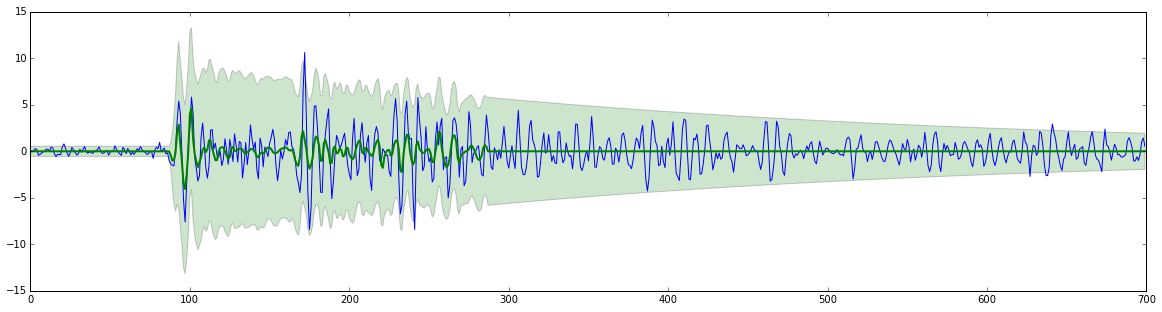

In [9]:
si=200
ei=900
s1 = wn.tssm.obs_var(1700)
def plot_predicted():
    f = figure(figsize=(20, 5))
    wn = sg.station_waves["MK31"][0]
    z1 = wn.tssm.prior_sample(1700, 0)
    #plot(z1[200:600])
    s1 = wn.tssm.obs_var(1700)
    m1 = wn.tssm.mean_obs(1700)
    #plot(m1[si:ei], lw=2)
    #plot(m1[si:ei]+np.sqrt(s1)[si:ei], lw=4)
    print wn.log_p()
    #u1 = wn.unexplained_kalman()
    figure(figsize=(20, 5))
    plot(wn.get_value()[si:ei])
    #plot(u1[si:ei])
    plot(m1[si:ei], lw=2)
    plt.fill_between(np.arange(ei-si), m1[si:ei]+2*np.sqrt(s1[si:ei]),  m1[si:ei]-2*np.sqrt(s1[si:ei]), facecolor="green", alpha=0.2)
    #figure(figsize=(20, 5))
    #subtracted1 = wn.get_value() - m1

    #plot(subtracted1[si:ei])
    #print wn.nm.log_p(subtracted1)

plot_predicted()



In [16]:
"""
from sigvisa.infer.run_mcmc import run_open_world_MH

run_open_world_MH(sg, steps=1000,
                      enable_event_openworld=False,
                      enable_event_moves=True,
                      enable_template_openworld=False,
                      enable_template_moves=True)
"""

'\nfrom sigvisa.infer.run_mcmc import run_open_world_MH\n\nrun_open_world_MH(sg, steps=1000,\n                      enable_event_openworld=False,\n                      enable_event_moves=True,\n                      enable_template_openworld=False,\n                      enable_template_moves=True)\n'

3.49029619189
[-2328.70997586]
-2288.35245341


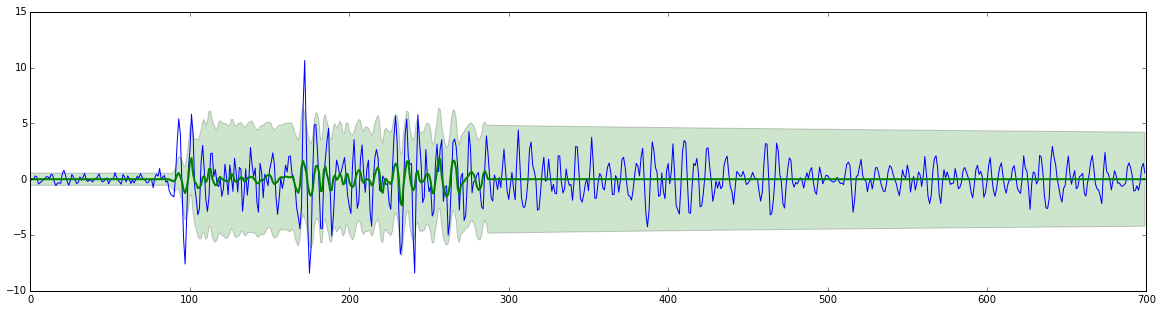

In [10]:
print sg.all_nodes["1;P;MK31;:;:;amp_transfer"].get_value() 
#sg.all_nodes["1;P;MK31;:;:;amp_transfer"].set_value(3.06387673875)
print sg.current_log_p()
plot_predicted()
#3.70620502114 [-2564.34738735]

In [11]:
from sigvisa.infer.event_birthdeath import ev_death_move_abstract
ev_death_move_abstract(sg, location_proposal=correlation_prop_MKAR,  
                       proposal_includes_mb=False, use_correlation=True)

reverse dist 4.06847199236 0.0438429971135 old mb 3.75645655285 lp -0.465621354515
proposing to deassociate at MK31 (lp -0.0)
peak_lp 0.0906479410135
amp_lp 3.59169329702
proposing to associate template 1 at MK31,P with assoc lp -0.0
peak_lp 2.08771366925
amp_lp 1.69545794952
fix result: tmpl lp 3.783172 for 1, {'coda_decay': -6.1574257816746476, 'peak_offset': 0.7737506254398725, 'coda_height': 1.044343628060556, 'arrival_time': 1240246031.5713716, 'tt_residual': 2.5260038375854492, 'peak_decay': -3.1112679296013521}
proposing to birth new phase MK31,P with assoc lp -0.0 tmpl lp 3.783172
birth qforward +  [ -5.22962328e-05] 3.78317161877 = [ 3.78311932]
death helper -0.465621354515 [ 3.78311932] -0.0549777716331
death move acceptance [ 161.38813651] from [-2328.70997586] -2166.90448789 [ 3.2625202] [ 3.67987167]


True

In [14]:
print sg.current_log_p()
wn = sg.station_waves["MK31"][0]

for arr in wn.arrivals():
    a, tg = wn.get_template_params_for_arrival(*arr)
    print arr
    print a

-1818.29391249
(-1, 'UA')
{'coda_height': 1.430382822358639, 'arrival_time': 1240246031.2095184, 'coda_decay': -3.341748754617234, 'peak_decay': -4.8863122776660814, 'peak_offset': -0.13893537112135543}


-1890.55419502


NameError: name 'plot_debug_dists' is not defined

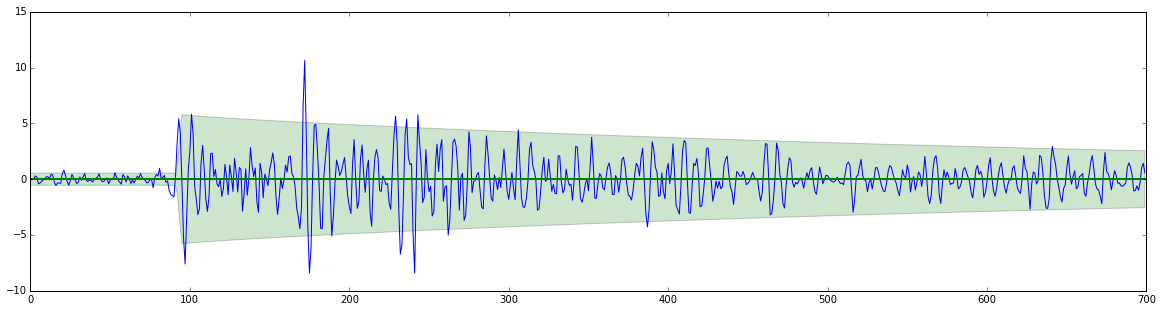

In [15]:
s2 = wn.tssm.obs_var(1700)

plot_predicted()

plot_debug_dists()

NameError: name 'plot_predicted' is not defined

In [16]:
print sg.current_log_p()
print sg.current_log_p_breakdown()

-1818.29391249
n_uatemplate: -13.8
n_event: -1.2
ev priors: ev 0.0
ev observations: ev 0.0
tt_residual: ev 0.0
ev global cost (n + priors + tt): -1.2
coda_decay: ev 0.0 ua -1.5 total -1.5
peak_decay: ev 0.0 ua -3.8 total -3.8
peak_offset: ev 0.0 ua -1.1 total -1.1
coda_height: ev 0.0 ua -2.1 total -2.1
mult_std_wiggle: ev 0.0 ua 0.0 total 0.0
coef jointgp: 0.0
total param: ev 0.0 ua -8.4 total -8.4
priors+params: ev -1.2 ua -22.2 total -23.5
station noise (observed signals): -1794.8
overall: -1818.3
official: -1818.3
None


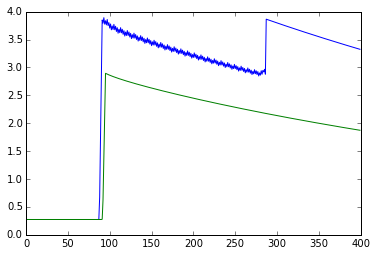

In [16]:

plot(np.sqrt(s1)[200:600])
plot(np.sqrt(s2)[200:600])
